# Final Project

In [1]:
# 移除不必要的警告
import warnings
warnings.filterwarnings('ignore')

### 獲取歷史資料

In [2]:
from finlab.data import Data
from finlab.ml import fundamental_features
fdf = fundamental_features()

data = Data()

close = data.get("收盤價")
open_ = data.get("開盤價")
high = data.get("最高價")
low = data.get("最低價")
vol = data.get("成交股數")

PB = data.get("股價淨值比")
pe = data.get("本益比")

#close = data.get_adj("收盤價").round(2)

#財務指標
rev = data.get("當月營收")
l_rev = data.get("去年當月營收")

#t123 = data.get('土地')

#bargin_i=data.get("投信買賣超股數")
#bargin_f=data.get("外資自營商買賣超股數")
#bargin_s=data.get("自營商買賣超股數(自行買賣)")
#

rev.index = rev.index.shift(5, "d")         #每月頻率
#周頻率

### 計算features

In [3]:
#MFI  = data.talib("MFI")
##MFI.tail()
#ub,mb,lb =data.talib("BBANDS")

#### 營收相關

In [4]:
##############################################　　　自己加入的　　　##############################################
import pandas as pd
from finlab.__init__ import talib_all_stock
from talib import abstract

In [5]:
def bias(n):
    return close / close.rolling(n, min_periods=1).mean()

def acc(n):
    return close.shift(n) / (close.shift(2*n) + close) * 2

def rsv(n):
    l = close.rolling(n, min_periods=1).min()
    h = close.rolling(n, min_periods=1).max()
    
    return (close - l) / (h - l)

def mom(n):
    return (rev / rev.shift(1)).shift(n)

def yoy(n):
    return (rev.shift(n) / rev.shift(12+n)) -1


features = {
    'mom1': mom(1),
    'mom2': mom(2),
    'mom3': mom(3),
    'mom4': mom(4),
    'mom5': mom(5),
    'mom6': mom(6),
    'mom7': mom(7),
    'mom8': mom(8),
    'mom9': mom(9),
    
    'bias5': bias(5),
    'bias10': bias(10),
    'bias20': bias(20),
    'bias60': bias(60),
    'bias120': bias(120),
    'bias240': bias(240),
    
    'acc5': acc(5),
    'acc10': acc(10),
    'acc20': acc(20),
    'acc60': acc(60),
    'acc120': acc(120),
    'acc240': acc(240),
    
    'rsv5': rsv(5),
    'rsv10': rsv(10),
    'rsv20': rsv(20),
    'rsv60': rsv(60),
    'rsv120': rsv(120),
    'rsv240': rsv(240),
###############################################
    'yoy': yoy(1),
    'delta_yoy':(yoy(1)/yoy(2))-1,
    
    'PB':PB,
    'PE':pe,       
}


#### 財報指標

兩個feature結合
[https://hahow.in/courses/5b9d3a6dca498a001e917383/discussions/5d18b63eac23d80020ae4ce7]

In [6]:
from finlab.ml import fundamental_features
dataset_fundamental = fundamental_features()

In [7]:
dataset_fundamental

T3395營業利益  T7210營運現金流  T3950歸屬母公司淨利    T7211折舊  \
stock_id date                                                         
1101     2013-05-15  2026729.0   2274053.0     1911110.0  1571884.0   
         2013-08-14  4588992.0   6029953.0      949640.0  1543041.0   
         2013-11-14  5910634.0   5168764.0     5025600.0  1605424.0   
         2014-03-31  5249620.0   8500835.0     6450131.0  2118671.0   
         2014-05-15  3684224.0   6895832.0     4015175.0  1594505.0   
...                        ...         ...           ...        ...   
9962     2021-05-15     8016.0    149610.0        6847.0     5027.0   
         2021-08-14    40404.0   -155514.0       41534.0     4813.0   
         2021-11-14    48861.0   -435827.0       42439.0     4855.0   
         2022-03-31    66532.0     74308.0       57469.0     4541.0   
         2022-05-15    44919.0    304147.0       39436.0     4397.0   

                      T0100流動資產   T1100流動負債  T7324取得不動產廠房及設備  T3970經常稅後淨利  \
stock_id date                                                               
1101     2013-05-15  77246355.0  65913019.0        -211456.0    1999624.0   
         2013-08-14  77139390.0  68971246.0       -1033541.0    3802105.0   
         2013-11-14  77212043.0  73733391.0        -470935.0    5344662.0   
         2014-03-31  87788055.0  70398494.0       -1089134.0    3972292.0   
         2014-05-15  92121458.0  74388787.0        -940633.0    2791235.0   
...                         ...         ...              ...          ...   
9962     2021-05-15    699386.0     76254.0          -3081.0       6607.0   
         2021-08-14    976044.0    274123.0          -2374.0      37397.0   
         2021-11-14   1420059.0    671731.0          -4677.0      40088.0   
         2022-03-31   1413495.0    581642.0          -8826.0      56074.0   
         2022-05-15   1217003.0    352094.0          -1292.0      37016.0   

                     R101_ROA稅後息前  R11V_ROA綜合損益  ...  R409_淨值成長率   R501_流動比率  \
stock_id date                                    ...                           
1101     2013-05-15           NaN           NaN  ...         NaN  117.194382   
         2013-08-14     -1.233843      0.944284  ...         NaN  111.842825   
         2013-11-14     -1.130208      2.481737  ...         NaN  104.717879   
         2014-03-31     -0.339410      3.102975  ...         NaN  124.701609   
         2014-05-15     -1.732411      1.630076  ...    8.866880  123.837828   
...                           ...           ...  ...         ...         ...   
9962     2021-05-15      0.618888      0.636208  ...    1.131801  917.179427   
         2021-08-14      3.243048      3.596651  ...    7.003658  356.060601   
         2021-11-14      2.691891      2.839898  ...   11.206472  211.402928   
         2022-03-31      3.352989      3.383973  ...   15.804715  243.018042   
         2022-05-15      2.371942      2.484802  ...   19.138403  345.647185   

                      R502_速動比率  R503_利息支出率   R678_營運資金  R607_總資產週轉次數  \
stock_id date                                                           
1101     2013-05-15   83.137456   -8.186859  11333336.0           NaN   
         2013-08-14   79.609613  -13.298556   8168144.0      0.104927   
         2013-11-14   83.502774  -17.083477   3478652.0      0.110355   
         2014-03-31  102.946688  -32.624816  17389561.0      0.119738   
         2014-05-15  101.776758   -9.792979  17732671.0      0.093998   
...                         ...         ...         ...           ...   
9962     2021-05-15  271.866394    1.005915    623132.0      0.380922   
         2021-08-14  110.054975    0.178902    701921.0      0.594034   
         2021-11-14   27.425413    0.432543    748328.0      0.428734   
         2022-03-31   39.386083    1.907177    831853.0      0.503416   
         2022-05-15   85.204235    2.087938    864909.0      0.525429   

                     R610_存貨週轉率  R612_固定資產週轉次數  R613_淨值週轉率次  R69B_自由現金流量  
stock_id date                

#### 技術指標

In [8]:
# https://zhuanlan.zhihu.com/p/342075180 talib函数功能一览表

def bias(n):
    return close / close.rolling(n, min_periods=1).mean()

def acc(n):
    return close.shift(n) / (close.shift(2*n) + close) * 2

def rsv(n):
    l = close.rolling(n, min_periods=1).min()
    h = close.rolling(n, min_periods=1).max()
    
    return (close - l) / (h - l)

def mom(n):
    return (rev / rev.shift(1)).shift(n)


def bi_(n):
    return (bargin_i / vol.shift(1)).shift(n)

def bf(n):
    return (bargin_f / vol.shift(1)).shift(n)
    
def bs(n):
    return (bargin_s / vol.shift(1)).shift(n)

def rsi(n):
    #return talib_all_stock(ndays=10000, func=abstract.RSI, timeperiod=n)
    return data.talib("RSI",timeperiod=n)

def MFI(n):
    return data.talib("MFI",timeperiod=n)

def obv(n):
    return data.talib("OBV",timeperiod=n)



features = {
    
    #'ATR14':data.talib("ATR",timeperiod=14),
    #'NATR14':data.talib('NATR',timeperiod=14),
    #'TRANGE':data.talib('TRANGE'),
    #'Adosc3':data.talib('ADOSC',timeperiod=3),
    
    #"MFI5":MFI(5),
    #"MFI10":MFI(10),
    
    #'rsi6': rsi(6),  #DataFrame
    #'rsi10': rsi(10),  #DataFrame
    #'rsi14': rsi(14),  #DataFrame
    #'rsi20': rsi(20),  #DataFrame
    #'rsi50': rsi(50),  #DataFrame
   
    'mom1': mom(1),
    'mom2': mom(2),
    'mom3': mom(3),
    'mom4': mom(4),
    'mom5': mom(5),
    'mom6': mom(6),
    'mom7': mom(7),
    'mom8': mom(8),
    'mom9': mom(9),
    
    'yoy': yoy(1),
    'delta_yoy':yoy(1)-yoy(2),
    
#    'ff':ff,
    'PB':PB,
    'PE':pe,   
#  
    'bias5': bias(5),
    'bias10': bias(10),
    'bias20': bias(20),
    'bias60': bias(60),
    'bias120': bias(120),
    'bias240': bias(240),
    
    'acc5': acc(5),
    'acc10': acc(10),
    'acc20': acc(20),
    'acc60': acc(60),
    'acc120': acc(120),
    'acc240': acc(240),
    
    #'rsv5': rsv(5),
    #'rsv10': rsv(10),
    #'rsv20': rsv(20),
    #'rsv60': rsv(60),
    #'rsv120': rsv(120),
    #'rsv240': rsv(240),
}


#### 組合dataset

In [9]:
import pandas as pd

#### 確認各指標清單

In [10]:
list1=sorted(features)
list1

['PB',
 'PE',
 'acc10',
 'acc120',
 'acc20',
 'acc240',
 'acc5',
 'acc60',
 'bias10',
 'bias120',
 'bias20',
 'bias240',
 'bias5',
 'bias60',
 'delta_yoy',
 'mom1',
 'mom2',
 'mom3',
 'mom4',
 'mom5',
 'mom6',
 'mom7',
 'mom8',
 'mom9',
 'yoy']

In [11]:
#t1 = data.talib("NATR",timeperiod=14)
#t1.to_csv('myfile.csv')

### 製作dataset

##### 設定買賣頻率

In [12]:
#rev.index = rev.index.tz_localize("Asia/Taipei")
every_month = rev.index
every_month

DatetimeIndex(['2005-02-15', '2005-03-15', '2005-04-15', '2005-05-15',
               '2005-06-15', '2005-07-15', '2005-08-15', '2005-09-15',
               '2005-10-15', '2005-11-15',
               ...
               '2022-02-15', '2022-03-15', '2022-04-15', '2022-05-15',
               '2022-06-15', '2022-07-15', '2022-08-15', '2022-09-15',
               '2022-10-15', '2022-11-15'],
              dtype='datetime64[ns]', name='date', length=214, freq=None)

#### 將dataframe 組裝起來

In [13]:
# features['bias20'].reindex(every_month, method='ffill')

for name, f in features.items():
    features[name] = f.reindex(every_month, method='ffill')

In [14]:

for name, f in features.items():
    features[name] = f.unstack()

In [15]:
import pandas as pd
dataset = pd.DataFrame(features)

In [16]:
feature_names = list(dataset.columns)

In [17]:
##############################################　　　自己加入的　　　##############################################
dataset.index = dataset.index.set_names(['stock_id','date'], level=[0,1])


#dataset.index.levels[1].name = 'date'
#dataset.index.levels[0].name = 'stock_id'

#因為你pandas更新到新版了
## profit.index.levels[0].name = 'year'
## profit.index.levels[1].name = 'month'
#這兩行的語法被棄用，請改成
#profit.index=profit.index.set_names('year', level=0)
#profit.index=profit.index.set_names('month', level=1)
#or profit.index=profit.index.set_names(['year','month'], level=[0,1])
#直接一行
#就可以了

### 新增 label

In [18]:
from finlab import ml

ml.add_profit_prediction(dataset)
ml.add_rank_prediction(dataset)

### 刪除太大太小的歷史資料

In [19]:
print(dataset.shape)

def drop_extreme_case(dataset, feature_names, thresh=0.01):
    
    extreme_cases = pd.Series(False, index=dataset.index)
    for f in feature_names:
        tf = dataset[f]
        extreme_cases = extreme_cases | (tf < tf.quantile(thresh)) | (tf > tf.quantile(1-thresh))
    dataset = dataset[~extreme_cases]
    return dataset

dataset_drop_extreme_case = drop_extreme_case(dataset , list1 , thresh=0.01)

print(dataset_drop_extreme_case.shape)

##(436560, 27)
##(377538, 27)

##(505602, 75)
##(446580, 75)

(437416, 27)
(378396, 27)


In [20]:
dataset_dropna = dataset_drop_extreme_case.dropna(how='any')
dataset_dropna = dataset_dropna.reset_index().set_index("date")

In [21]:
dataset_drop_extreme_case.index.get_level_values("date")

DatetimeIndex(['2005-02-15', '2005-03-15', '2005-04-15', '2005-05-15',
               '2005-06-15', '2005-07-15', '2005-08-15', '2005-09-15',
               '2005-10-15', '2005-11-15',
               ...
               '2021-11-15', '2021-12-15', '2022-02-15', '2022-03-15',
               '2022-04-15', '2022-06-15', '2022-08-15', '2022-09-15',
               '2022-10-15', '2022-11-15'],
              dtype='datetime64[ns]', name='date', length=378396, freq=None)

In [22]:
##############################################　　　自己加入的　　　##############################################

dataset_dropna.index = pd.to_datetime(dataset_dropna.index)
dataset_dropna = dataset_dropna.sort_index()

#修復＜class ‘numpy.ndarray‘＞　https://blog.csdn.net/lxbin/article/details/114005757

In [23]:
dataset_train = dataset_dropna[:'2020']
dataset_test = dataset_dropna['2021':]

### 機器學習
 - 目前只有三個，技術指標也要在增加一下

#### keras

In [24]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers

import os


os.environ['KMP_DUPLICATE_LIB_OK']='True'

model = keras.models.Sequential()
model.add(layers.Dense(100, activation='relu',
                      input_shape=(len(feature_names),),
                      kernel_initializer=initializers.he_normal(seed=0)))
model.add(layers.Dense(100, activation='relu',
                      kernel_initializer=initializers.he_normal(seed=0)))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(1, activation='sigmoid'))


model.summary()

model.compile(loss='mean_squared_error',
              optimizer="adam",)

print('start fitting')
history = model.fit(dataset_train[feature_names], dataset_train['rank'],
                    batch_size=1000,         #1000  #每一个batch的大小
                    epochs=1000, #225          #迭代次数
                    verbose=1,
                    validation_split=0.1,
                    #validation_data =        #(测试集的输入特征，测试集的标签），
                    #validation_split =       # 从测试集中划分多少比例给训练集，
                    #validation_freq = 20        #测试的epoch间隔数                     
                   )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               2600      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 12,801
Trainable params: 12,801
Non-trainable params: 0
_________________________________________________________________
start fitting
Epoch 1/1000
103/103 [==============================] - ETA: 0s - loss: 0.256 - ETA: 0s - loss: 0.246 - ETA: 0s - loss: 0.225 - ETA: 0s - loss: 0.192 - ETA: 0s - loss: 0.164 - ETA: 0s - loss: 0.147 - ETA: 0s - loss: 0.135 - ETA: 0s - lo

##### 結果

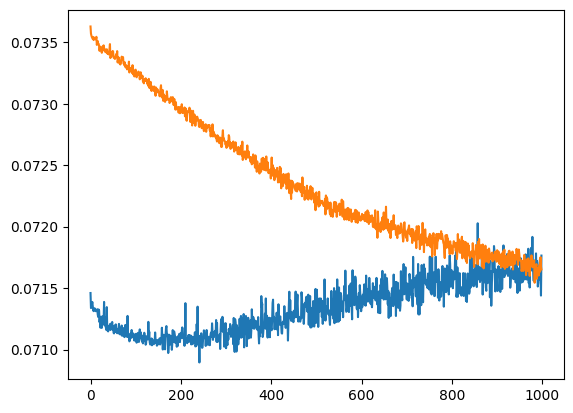

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['val_loss'][1:])
plt.plot(history.history['loss'][1:])

#### lightgbm Model

In [26]:
##############################################　　　自己加入的　　　##############################################
import lightgbm as lgb

cf = lgb.LGBMRegressor(n_estimators=5000)

train = dataset_train[feature_names] , dataset_train['return'] > 1
test = dataset_test[feature_names] , dataset_test['return'] > 1 

print('---cf.fit---')
print(cf.fit(*train))
print('---cf.score---')
print(cf.score(*test))
print('---predict---')
print(cf.predict(test[0]))

---cf.fit---
LGBMRegressor(n_estimators=5000)
---cf.score---
-0.07241856722725859
---predict---
[0.38741047 0.57010251 0.72164692 ... 0.62166592 0.62779552 0.52954333]


##### 參數優化_1110

In [27]:
#import lightgbm

fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [test],
            'eval_names': ['valid'],
            'verbose': 100,
            'categorical_feature': 'auto'}

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

#This parameter defines the number of HP points to be tested
n_HP_points_to_test = 100

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
clf = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

gs.fit(*train, **fit_params)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[36]	valid's auc: 0.556627
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.523495
Early stopping, best iteration is:
[89]	valid's auc: 0.524762
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[19]	valid's auc: 0.546677
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[20]	valid's auc: 0.555464
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.52393
Early stopping, best iteration is:
[97]	valid's auc: 0.523971
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[18]	valid's auc: 0.542674
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until valid

RandomizedSearchCV(cv=3,
                   estimator=LGBMClassifier(metric='None', n_estimators=5000,
                                            n_jobs=4, random_state=314),
                   n_iter=100,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002AA62161DC8>,
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002AA5EE81408>,
                                        'min_child_weight': [1e-05, 0.001, 0.01,
                                                             0.1, 1, 10.0,
                                                             100.0, 1000.0,
                                                             10000.0],
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002AA62161648>,
                                        'reg_alpha': [0, 0.1, 1, 2, 5, 7, 10,
         

In [28]:
gs.best_estimator_

LGBMClassifier(colsample_bytree=0.9442991955065878, metric='None',
               min_child_samples=152, min_child_weight=1000.0,
               n_estimators=5000, n_jobs=4, num_leaves=38, random_state=314,
               reg_alpha=10, reg_lambda=0.1, subsample=0.2676349956143538)

In [29]:
#
#gs.best_estimator_
#LGBMClassifier(colsample_bytree=0.6433117836032942, metric='None',
#               min_child_samples=224, min_child_weight=1e-05, n_estimators=5000,
#               n_jobs=4, num_leaves=20, random_state=314, reg_alpha=10,
#               reg_lambda=10, subsample=0.8945613420997809)

In [30]:
cf = lgb.LGBMRegressor(colsample_bytree=0.4893610123694421, metric='None',
               min_child_samples=325, n_estimators=5000, n_jobs=4,
               num_leaves=44, random_state=314, reg_alpha=7, reg_lambda=20,
               subsample=0.3338474163716765)

cf.fit(dataset_train[feature_names],dataset_train['return'] > 1, **fit_params)
cf.score(dataset_test[feature_names],dataset_test['return'] > 1)

Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[43]	valid's auc: 0.548978


0.005342788722115577

In [31]:
#print(cf.fit(*train))

In [32]:
#import lightgbm as lgb
#gbm = lgb.LGBMClassifier(n_estimators=100, random_state=5, learning_rate=0.01)
#gbm.fit(dataset_train[feature_names], dataset_train['return'] > 1)

In [33]:
#import tqdm
#
#n = 3
#
#X = []
#y = []
#indexes = []
#dataset_scaled_x = dataset_scaled[feature_names]
#
#for i in tqdm.tqdm_notebook(range(0, len(dataset_scaled)-n)):
#    X.append(dataset_scaled_x.iloc[i:i+n].values)
#    y.append(dataset_scaled['return'].iloc[i+n-1])
#    indexes.append(dataset_scaled.index[i+n-1])
##dataset_scaled.head()

In [34]:
#import numpy as np
#X = np.array(X)
#y = np.array(y)

In [35]:
##import lightgbm as lgb
#cf = lgb.LGBMRegressor(colsample_bytree=0.7740467183023685, metric='None',
#               min_child_samples=395, min_child_weight=0.01, n_estimators=5000,
#               n_jobs=4, num_leaves=9, random_state=314, reg_alpha=5,
#               reg_lambda=10, subsample=0.4643892520208455)
#    
#cf.fit(dataset_train[feature_names].astype(float), dataset_train['rank'])

#### Random Forest Model

In [36]:
from sklearn.ensemble import RandomForestRegressor

cf2 = RandomForestRegressor(n_estimators=100)
cf2.fit(dataset_train[feature_names].astype(float), dataset_train['rank'])  

RandomForestRegressor()

##### 參數優化_1110

In [37]:
from scipy.stats import randint as sp_randint 
from sklearn.model_selection import RandomizedSearchCV 
# build a classifier 
clf = RandomForestRegressor(n_estimators=100) 
# specify parameters and distributions to sample from 
param_dist = {"max_depth": [3, None], 
              "max_features": sp_randint(1, 11), 
              "min_samples_split": sp_randint(2, 11), 
              "min_samples_leaf": sp_randint(1, 11), 
              "bootstrap": [True, False], 
              "criterion": ["mse", "mae"]} 
# run randomized search 
n_iter_search = 20 
rs = RandomizedSearchCV(clf, param_distributions=param_dist, 
                                   n_iter=n_iter_search) 

In [38]:
##rs.fit(dataset_train[features], dataset_train['return'] > 1)

##### Split Train Test dataset

<AxesSubplot:xlabel='Value', ylabel='Feature'>

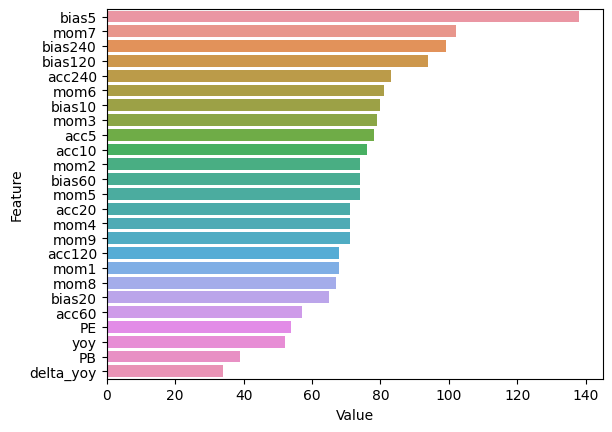

In [39]:
feature_imp = pd.DataFrame(zip(cf.feature_importances_, feature_names), 
                           columns=['Value','Feature']).sort_values('Value', ascending=False)
feature_imp

%matplotlib inline
import seaborn as sns
sns.barplot(x="Value", y="Feature", data=feature_imp)

In [40]:
select = dataset.index.get_level_values('date') < '2021'
dataset_train = dataset[select]
dataset_test = dataset[~select]

### Ensemble learning

In [41]:
dataset_drop = dataset.dropna(subset=feature_names+['return'])

vals = model.predict(dataset_drop[feature_names].astype(float))
dataset_drop['result1'] = pd.Series(vals.swapaxes(0,1)[0], dataset_drop.index)

vals = cf.predict(dataset_drop[feature_names].astype(float))
dataset_drop['result2'] = pd.Series(vals, dataset_drop.index)

vals = cf2.predict(dataset_drop[feature_names].astype(float))
dataset_drop['result3'] = pd.Series(vals, dataset_drop.index)

dataset_drop = dataset_drop.reset_index().set_index("date")

## backtest

把量加進來做篩選
 * https://hahow.in/courses/5b9d3a6dca498a001e917383/shapeussions/60c96f5b018697e8a6131cbc

In [42]:
#把量加進來
vol=data.get('成交股數')/1000
vol_ma5=vol.rolling(5).mean()

vol_filter=vol_ma5>1000
vol_filter=vol_filter[vol_filter].fillna(0).astype(float)
vol_filter

stock_id,0015,0050,0051,0052,0053,0054,0055,0056,0057,0058,...,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
date,,,,,,,,,,,,,,,,,,,,,
2007-04-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-04-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-04-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-04-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-04-27,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-02,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2022-12-05,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2022-12-06,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [43]:
#t1 = vol_ma5.iloc[-1].dropna()
#t1.to_csv('./tmp/132.csv')
#t1.hist(bins=10)

<AxesSubplot:xlabel='date'>

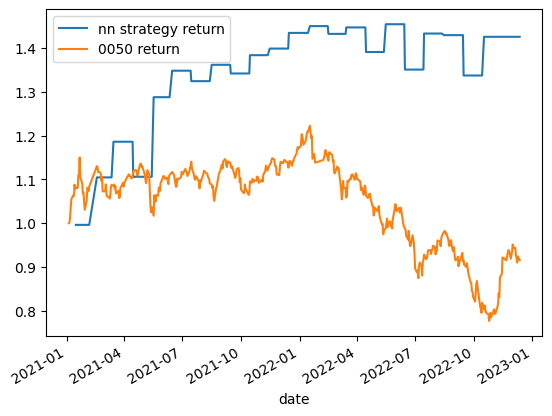

In [43]:
import math


dates = sorted(list(set(dataset_drop.index)))

rs = []
for d in dates:
    
    dataset_time = dataset_drop.loc[d]
    
    dataset_time = drop_extreme_case(dataset_time , list1 , thresh=0.01)
    
    rank = (dataset_time['result1'] + dataset_time['result2'] + dataset_time['result3'] ) #* vol_filter.loc[d]


    condition = (rank >= rank.nlargest(20).iloc[-1]) 
    
    r = dataset_time['return'][condition].mean()

    rs.append(r * (1-3/1000-1.425/1000*2*0.6))

rs = pd.Series(rs, index=dates)['2021':].cumprod()

s0050 = close['0050']['2021':]

pd.DataFrame({'nn strategy return':rs.reindex(s0050.index, method='ffill'), '0050 return':s0050/s0050[0]}).plot()



In [45]:
#import pickle
#
#return_history_1026 = pd.Series(rs, index=dates)['2021':].cumprod()
##eq = (gain[hold == 1].mean(axis=1)).fillna(1).cumprod()
#
#pickle.dump(rs, open('return_history_1026.pkl', 'wb'))

In [46]:
#import pyfolio as pf
#import pandas as pd
#
#close.index = close.index.tz_localize("Asia/Taipei")
##pf.create_returns_tear_sheet(close['0050'].pct_change())
#
## 得到 上一個單元的 回測結果
#ret = pickle.load(open("return_history_1026.pkl", "rb"))
#
## 將回測報酬率取出來
#ret = ret.pct_change().dropna()
#ret.index = pd.to_datetime(ret.index).tz_localize('Asia/Taipei')
#
## 利用pyfolio 比較報酬率
#pf.create_returns_tear_sheet(ret, benchmark_rets=close['0050'].pct_change())

### 當月持股狀況

In [47]:
#dataset.index.levels[1]

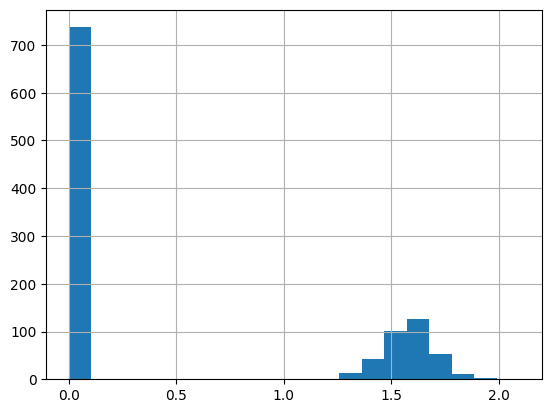

In [53]:
# get the latest dataset
last_date = dataset.index.levels[1].max()#"2022-10-15"
is_last_date = dataset.index.get_level_values('date') == last_date
last_dataset = dataset[is_last_date].copy()


last_dataset = drop_extreme_case(last_dataset, list1 , thresh=0.01)


# remove NaN testcases
last_dataset = last_dataset.dropna(subset=feature_names)

# predict

vals = model.predict(last_dataset[feature_names].astype(float))
last_dataset['result1'] = pd.Series(vals.swapaxes(0,1)[0], last_dataset.index)

vals = cf.predict(last_dataset[feature_names].astype(float))
last_dataset['result2'] = pd.Series(vals, last_dataset.index)

vals = cf2.predict(last_dataset[feature_names].astype(float))
last_dataset['result3'] = pd.Series(vals, last_dataset.index)


# calculate score

rank = last_dataset['result1'] + last_dataset['result2'] + last_dataset['result3']

#
rank = rank * vol_filter.iloc[-1] #******加上量的濾網

condition = (rank >= rank.nlargest(20).iloc[-1])
#vol_filter

# plot rank distribution
rank.hist(bins=20)


# show the best 20 stocks
slist1 = rank[condition].reset_index()['stock_id']

#https://keras-cn.readthedocs.io/en/latest/models/model/

In [49]:
vol_filter.iloc[-1]

stock_id
0015    0.0
0050    1.0
0051    0.0
0052    0.0
0053    0.0
       ... 
9951    0.0
9955    1.0
9958    1.0
9960    0.0
9962    0.0
Name: 2022-12-08 00:00:00, Length: 2011, dtype: float64

In [50]:
last_date = dataset.index.levels[1].max()#"2022-10-15"
is_last_date = dataset.index.get_level_values('date') == last_date
last_dataset = dataset[is_last_date].copy()

In [51]:
#rank.sort_values(ascending=False).head(20)

## 平均分配資產於股票之中

In [52]:
close = data.get("收盤價")

money = 60000
stock_prices = close[slist1].iloc[-1]


print("股票平分張數:")
money / len(stock_prices) / stock_prices / 1000


股票平分張數:


stock_id
2108    0.081633
2313    0.060729
2368    0.031513
2392    0.076923
2610    0.155440
2618    0.106952
2834    0.235294
3006    0.043103
3038    0.144231
3231    0.107914
3264    0.059172
3317    0.050167
3372    0.253165
3711    0.030928
4977    0.027273
6138    0.022472
6176    0.028302
6190    0.091185
8091    0.032859
8155    0.025641
Name: 2022-12-08 00:00:00, dtype: float64